# **Training and building a Convolutional Neural Network (CNN) model using the CIFAR-10 dataset.**

**Dataset Preparation and Preprocessing**

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical #encoding
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D #feautre extraction
from keras.layers import Flatten, Dense, Dropout #classification
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Data Augmentation

from sklearn.metrics import classification_report

C:\Users\Buse\AppData\Local\Temp\ipykernel_1536\1109163687.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = class_labels[int(y_train[i])]


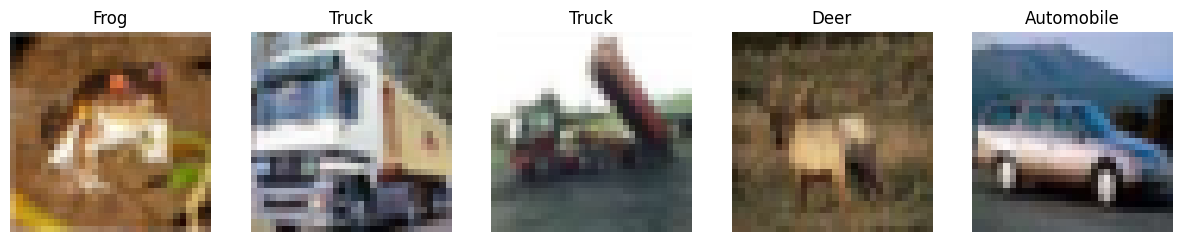

In [15]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# visualizing
class_labels = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

# Checking some images
fig, axes = plt.subplots(1,5,figsize=(15,10))

for i in range(5):
    axes[i].imshow(x_train[i])
    label = class_labels[int(y_train[i])]
    axes[i].set_title(label)
    axes[i].axis("off")
    
plt.show()


In [16]:
# Normalization of dataset
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

# One-hot encoding
y_train = to_categorical(y_train,10) # due to existing 10 class
y_test = to_categorical(y_test,10)

In [17]:
datagen = ImageDataGenerator(
    rotation_range = 20, # It allows rotating the image up to 20 degrees.
    width_shift_range = 0.2, # It shifts the image horizontally by 20%.
    height_shift_range = 0.2, # It shifts the image vertically by 20%.
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True, 
    fill_mode = "nearest" # It uses the nearest pixel values to fill empty areas.
)
    
datagen.fit(x_train) # Data Augmentation on training set.

**Creating, compiling and training model**

In [18]:
model = Sequential()

# Feature Extraction : CONV -> RELU -> CONV -> RELU -> POOL -> DROPOUT
model.add(Conv2D(32,(3,3),padding = "same",activation="relu",input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Feature Extraction : CONV -> RELU -> CONV -> RELU -> POOL -> DROPOUT
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Classification : FLATTEN, DENSE, RELU, DROPOUT, DENSE(OUTPUT LAYER)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.summary()


c:\Users\Buse\Desktop\first_NN\tensorflow_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer=RMSprop(learning_rate= 0.0001, decay=1e-6),
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

c:\Users\Buse\Desktop\first_NN\tensorflow_env\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [13]:
# Model training
history = model.fit(datagen.flow(x_train,y_train, batch_size=64),
          epochs = 32,
          validation_data = (x_test,y_test) # Validation set
          )

Epoch 1/32
  1/782 ━━━━━━━━━━━━━━━━━━━━ 49s 64ms/step - accuracy: 0.5781 - loss: 1.0597

c:\Users\Buse\Desktop\first_NN\tensorflow_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6081 - loss: 1.1091 - val_accuracy: 0.6612 - val_loss: 0.9798
Epoch 2/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6078 - loss: 1.1075 - val_accuracy: 0.6451 - val_loss: 1.0338
Epoch 3/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6180 - loss: 1.0903 - val_accuracy: 0.6453 - val_loss: 1.0228
Epoch 4/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6158 - loss: 1.0824 - val_accuracy: 0.6424 - val_loss: 1.0381
Epoch 5/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6149 - loss: 1.0880 - val_accuracy: 0.6756 - val_loss: 0.9179
Epoch 6/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6226 - loss: 1.0722 - val_accuracy: 0.6828 - val_loss: 0.8983
Epoch 7/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6252 - loss: 1.0644 - val_accuracy: 0.6617 - val_loss: 1.0081
Epoch 8/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6254 - loss: 1.0639 - val_accurac

In [22]:
# Testing model and evaluating performance
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test, axis=1)

report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

    Airplane       0.00      0.00      0.00      1000
  Automobile       0.11      0.12      0.12      1000
        Bird       0.00      0.00      0.00      1000
         Cat       0.00      0.00      0.00      1000
        Deer       0.00      0.00      0.00      1000
         Dog       0.10      0.03      0.04      1000
        Frog       0.00      0.00      0.00      1000
       Horse       0.10      0.83      0.17      1000
        Ship       0.00      0.00      0.00      1000
       Truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.03      0.10      0.03     10000
weighted avg       0.03      0.10      0.03     10000



c:\Users\Buse\Desktop\first_NN\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Buse\Desktop\first_NN\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Buse\Desktop\first_NN\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

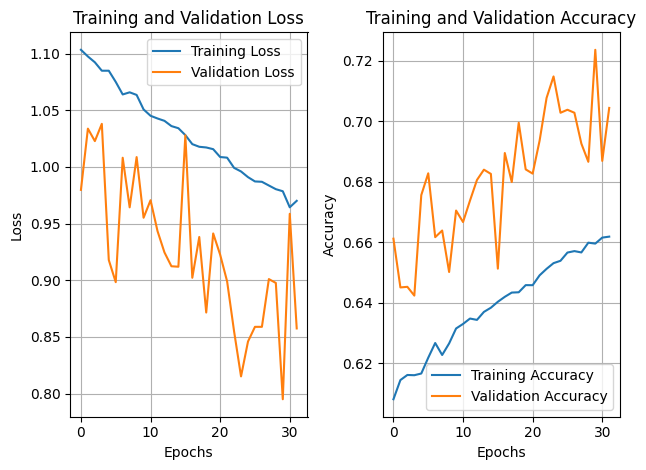

In [23]:
plt.figure()
# Loss Graphics
plt.subplot(1,2,1) # 1 row, 1 column and 1. subplot
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()

# Accuracy
plt.subplot(1,2,2) 
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()